In [2]:
pip install opencv-python-headless


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.8 MB 2.1 MB/s eta 0:00:19
    --------------------------------------- 0.6/38.8 MB 5.7 MB/s eta 0:00:07
   - -------------------------------------- 1.2/38.8 MB 7.5 MB/s eta 0:00:05
   -- ------------------------------------- 2.1/38.8 MB 10.1 MB/s eta 0:00:04
   -- ------------------------------------- 2.6/38.8 MB 10.3 MB/s eta 0:00:04
   -- ------------------------------------- 2.8/38.8 MB 9.0 MB/s eta 0:00:04
   ---- ----------------------------------- 4.3/38.8 MB 11.9 MB/s eta 0:00:03
   ------ --------------------------------- 6.1/38.8 MB 15.1 MB/s eta 0:00:03
   --------- ------------------------------ 9.1/38.8 MB 20.8 MB/s eta 0:00:02
   ------------- -------------------------- 13.5/38.8 MB 59.5 MB/s eta 0:00:01
   ------------------ --------------------- 18.4/38.8 MB 108.8 MB/s eta 0:00:01
   

In [2]:
pip install pandas nibabel


   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.3 MB ? eta -:--:--
    --------------------------------------- 0.1/3.3 MB 1.1 MB/s eta 0:00:03
   ------- -------------------------------- 0.6/3.3 MB 6.2 MB/s eta 0:00:01
   ------------- -------------------------- 1.1/3.3 MB 7.2 MB/s eta 0:00:01
   -------------------------- ------------- 2.2/3.3 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------  3.3/3.3 MB 14.0 MB/s eta 0:00:01
   ---------------------------------------- 3.3/3.3 MB 13.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import pandas as pd



# Yolo Model .nii to png and annotations

In [10]:


# # Define the grayscale colors and corresponding organs
# grayscale_colors = [(51, 51, 51), (255, 255, 255), (102, 102, 102), (204, 204, 204), (153, 153, 153)]
# organs = ['bowel', 'liver', 'spleen', 'right kidney', 'left kidney']  # Include both left and right kidney

# # Define the RGB colors for each organ
# rgb_colors = [
#     (255, 0, 255),   # Magenta for bowel
#     (255, 0, 0),     # Red for liver
#     (0, 255, 0),     # Green for spleen
#     (0, 255, 255),   # Cyan for right kidney
#     (0, 0, 255)      # Blue for left kidney
# ]

# # Function to process and save slices from a NIfTI file
# def process_nii_to_png(nii_path, output_dir, annotation_dir, label_df, scale_factor=51):
#     # Load the NIfTI image
#     nii_img = nib.load(nii_path)
#     data = nii_img.get_fdata()
#     print(f"Shape of NIfTI data: {data.shape}")

#     # Ensure the output directory exists
#     os.makedirs(output_dir, exist_ok=True)
#     os.makedirs(annotation_dir, exist_ok=True)

#     images = []
    
#     base_filename = os.path.splitext(os.path.basename(nii_path))[0]
#     print(f"Base filename: {base_filename}")

#     for i in range(data.shape[2]):
        
#         img = data[:, :, i] * scale_factor
#         if img.max() > 0:
#             img = np.rot90(img)  # Rotate the image
            
#             # Initialize a blank color image
#             color_img = np.zeros((*img.shape, 3), dtype=np.uint8)
            
#             bboxes = []

#             for idx, (grayscale, rgb) in enumerate(zip(grayscale_colors, rgb_colors)):
#                 mask = img == grayscale[0]
#                 color_img[mask] = rgb

#                 # Find contours and create bounding boxes
#                 contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#                 for contour in contours:
#                     x, y, w, h = cv2.boundingRect(contour)
#                     bboxes.append((organs[idx], x, y, w, h))  # Store organ name instead of index
            
#             # Save the image as a PNG file
#             png_filename = os.path.join(output_dir, f'{base_filename}_slice_{i:04d}.png')
#             print("i :",i,"    png_filename",png_filename)
#             cv2.imwrite(png_filename, cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR))
            
#             # Save the bounding boxes in YOLO format
#             annotation_filename = os.path.join(annotation_dir, f'{base_filename}_slice_{i:04d}.txt')
#             print(annotation_filename)
#             with open(annotation_filename, 'w') as f:
#                 for bbox in bboxes:
#                     organ, x, y, w, h = bbox

#                     # Map CSV labels to defined organs
#                     if organ == 'right kidney' or organ == 'left kidney':
#                         label = 'kidney'
#                     else:
#                         label = organ
                    
#                     # Check if series_id (base_filename) exists in label_df['series_id']
#                     if str(base_filename) in label_df['series_id'].astype(str).values.tolist():
#                         # print(f"Series ID {base_filename} found in label_df.")
#                         filtered_df = label_df.loc[label_df['series_id'].astype(str) == str(base_filename)]
#                         if not filtered_df.empty:
#                             label_row = filtered_df.iloc[0]
#                             # print(f"Label row: {label_row}")
                            
#                             # Define label based on CSV information
#                             label_info = {
#                                 'liver': ('healthy' if label_row['liver_healthy'] == 1 else
#                                           'low' if label_row['liver_low'] == 1 else
#                                           'high' if label_row['liver_high'] == 1 else None),
#                                 'spleen': ('healthy' if label_row['spleen_healthy'] == 1 else
#                                            'low' if label_row['spleen_low'] == 1 else
#                                            'high' if label_row['spleen_high'] == 1 else None),
#                                 'bowel': ('healthy' if label_row['bowel_healthy'] == 1 else
#                                           'injury' if label_row['bowel_injury'] == 1 else None),
#                                 'kidney': ('healthy' if label_row['kidney_healthy'] == 1 else
#                                            'low' if label_row['kidney_low'] == 1 else
#                                            'high' if label_row['kidney_high'] == 1 else None)
#                             }
                            
#                             # Only proceed if the organ's label is not None
#                             if label_info[label] is not None:
#                                 # Construct the combined label
#                                 combined_label = f"{label}_{label_info[label]}"
#                                 # print(f'Combined label: {combined_label}')
                                
#                                 # Assign class ID based on combined labels mapping
#                                 if combined_label in combined_labels:
#                                     cls_id = combined_labels[combined_label]
#                                     x_center = (x + w / 2) / img.shape[1]
#                                     y_center = (y + h / 2) / img.shape[0]
#                                     width = w / img.shape[1]
#                                     height = h / img.shape[0]
#                                     f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
#                                 else:
#                                     print(f"Warning: Combined label '{combined_label}' not found in combined_labels. Skipping annotation...")
#                             else:
#                                 print(f"Warning: Organ '{label}' is not present in the mask for {base_filename}. Skipping annotation...")
#                         else:
#                             print(f"Warning: Filtered DataFrame is empty for series_id {base_filename}. Skipping annotation...")
#                     else:
#                         print(f"Warning: Series ID '{base_filename}' not found in label_df. Skipping annotation...")
            
#             images.append(color_img)
    
#     print(f"Total slices processed: {len(images)}")
#     print("=*100")
#     return images

# # Example usage
# nii_dir = '../Data/segmentations'
# output_dir = '../Outputs/Pre-processing/V1/example_pngs_masks'
# annotation_dir = '../Outputs/Pre-processing/V1/example_annotations' 
# csv_file = '../Data/merged_dataframe.csv'

# # Load label CSV into DataFrame
# label_df = pd.read_csv(csv_file)

# # Define combined labels mapping (example)
# combined_labels = {
#     'bowel_healthy': 0,
#     'bowel_injury': 1,
#     'liver_healthy': 2,
#     'liver_low': 3,
#     'liver_high': 4,
#     'spleen_healthy': 5,
#     'spleen_low': 6,
#     'spleen_high': 7,
#     'kidney_healthy': 8,
#     'kidney_low': 9,
#     'kidney_high': 10
# }

# # List all files in the directory
# nii_files = os.listdir(nii_dir)

# # # Filter only files ending with .nii
# # nii_files = [file for file in nii_files if file.endswith('.nii')]

# # # Choose the first 10 files
# # first_10_nii_files = nii_files[:30]

# # # Process each selected NIfTI file
# # for nii_file in first_10_nii_files:
# #     nii_path = os.path.join(nii_dir, nii_file)
# #     print(f"Processing: {nii_path}")
# #     # Call your process function here with nii_path as an argument
# #     process_nii_to_png(nii_path, output_dir, annotation_dir, label_df)



# # nii_files = ['21057.nii','51033.nii','397.nii','10494.nii']
# nii_files = ['10494.nii']

# # Check if the file exists in the directory
# for nii_file in nii_files:
#     if nii_file in os.listdir(nii_dir):
#         nii_path = os.path.join(nii_dir, nii_file)
#         print(f"Processing: {nii_path}")
#         # Call your process function here with nii_path as an argument
#         process_nii_to_png(nii_path, output_dir, annotation_dir, label_df)
#     else:
#         print(f"File {nii_file} not found in the directory.")

Processing: ../Data/segmentations\10494.nii
Shape of NIfTI data: (512, 512, 245)
Base filename: 10494
i : 30     png_filename ../Outputs/Pre-processing/V1/example_pngs_masks\10494_slice_0030.png
../Outputs/Pre-processing/V1/example_annotations\10494_slice_0030.txt
i : 31     png_filename ../Outputs/Pre-processing/V1/example_pngs_masks\10494_slice_0031.png
../Outputs/Pre-processing/V1/example_annotations\10494_slice_0031.txt
i : 32     png_filename ../Outputs/Pre-processing/V1/example_pngs_masks\10494_slice_0032.png
../Outputs/Pre-processing/V1/example_annotations\10494_slice_0032.txt
i : 33     png_filename ../Outputs/Pre-processing/V1/example_pngs_masks\10494_slice_0033.png
../Outputs/Pre-processing/V1/example_annotations\10494_slice_0033.txt
i : 34     png_filename ../Outputs/Pre-processing/V1/example_pngs_masks\10494_slice_0034.png
../Outputs/Pre-processing/V1/example_annotations\10494_slice_0034.txt
i : 35     png_filename ../Outputs/Pre-processing/V1/example_pngs_masks\10494_slice

In [22]:
# import os
# import numpy as np
# import nibabel as nib
# import pandas as pd
# import cv2

# # Define the grayscale colors and corresponding organs
# grayscale_colors = [(51, 51, 51), (255, 255, 255), (102, 102, 102), (204, 204, 204), (153, 153, 153)]
# organs = ['bowel', 'liver', 'spleen', 'right kidney', 'left kidney']

# # Define the RGB colors for each organ
# rgb_colors = [
#     (255, 0, 255),   # Magenta for bowel
#     (255, 0, 0),     # Red for liver
#     (0, 255, 0),     # Green for spleen
#     (0, 255, 255),   # Cyan for right kidney
#     (0, 0, 255)      # Blue for left kidney
# ]

# # Function to process and save slices from a NIfTI file
# def process_nii_to_png(nii_path, output_dir, annotation_dir, label_df, scale_factor=51):
#     # Load the NIfTI image
#     nii_img = nib.load(nii_path)
#     data = nii_img.get_fdata()
#     print(f"Shape of NIfTI data: {data.shape}")

#     # Ensure the output directory exists
#     os.makedirs(output_dir, exist_ok=True)
#     os.makedirs(annotation_dir, exist_ok=True)

#     images = []
    
#     base_filename = os.path.splitext(os.path.basename(nii_path))[0]
#     print(f"Base filename: {base_filename}")

#     # Find the matching row in label_df based on series_id
#     # series_id = int(base_filename)  # Assuming base_filename is the series_id
#     # filtered_df = label_df[label_df['series_id'] == series_id]

#     # Find the matching row in label_df based on series_id
#     series_id = str(base_filename)  # Convert base_filename to string
#     filtered_df = label_df[label_df['series_id'].astype(str) == series_id]



#     if filtered_df.empty:
#         print(f"No matching entry found in label_df for series_id {series_id}. Skipping processing.")
#         return
    
#     # Get the first row (assuming only one entry per series_id)
#     label_row = filtered_df.iloc[0]

#     # Create a combined ID for naming based on series_id and additional information
#     combined_id = f"{label_row['combined_id']}"  # Modify this as per your data


#     for i in range(data.shape[2]):
        
#         img = data[:, :, i] * scale_factor
        
#         img = np.rot90(img)  # Rotate the image
        
#         # Initialize a blank color image
#         color_img = np.zeros((*img.shape, 3), dtype=np.uint8)
        
#         bboxes = []

#         for idx, (grayscale, rgb) in enumerate(zip(grayscale_colors, rgb_colors)):
#             mask = img == grayscale[0]
#             color_img[mask] = rgb

#             # Find contours and create bounding boxes
#             contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#             for contour in contours:
#                 x, y, w, h = cv2.boundingRect(contour)
#                 bboxes.append((organs[idx], x, y, w, h))  # Store organ name instead of index
        
#         # Resize the image to 224x224
#         resized_color_img = cv2.resize(color_img, (224, 224))
        
#         # Save the resized image as a PNG file with combined ID and slice number
#         png_filename = os.path.join(output_dir, f'{combined_id}_{i:04d}.png')
#         print(f"Saving PNG mask: {png_filename}")
#         cv2.imwrite(png_filename, cv2.cvtColor(resized_color_img, cv2.COLOR_RGB2BGR))
        
#         # Save the bounding boxes in YOLO format with combined ID and slice number
#         annotation_filename = os.path.join(annotation_dir, f'{combined_id}_{i:04d}.txt')
#         print(f"Saving annotation: {annotation_filename}")
#         with open(annotation_filename, 'w') as f:
#             for bbox in bboxes:
#                 organ, x, y, w, h = bbox

#                 # Map CSV labels to defined organs
#                 if organ == 'right kidney' or organ == 'left kidney':
#                     label = 'kidney'
#                 else:
#                     label = organ
                
#                 # Define label based on CSV information
#                 label_info = {
#                     'liver': ('healthy' if label_row['liver_healthy'] == 1 else
#                               'low' if label_row['liver_low'] == 1 else
#                               'high' if label_row['liver_high'] == 1 else None),
#                     'spleen': ('healthy' if label_row['spleen_healthy'] == 1 else
#                                'low' if label_row['spleen_low'] == 1 else
#                                'high' if label_row['spleen_high'] == 1 else None),
#                     'bowel': ('healthy' if label_row['bowel_healthy'] == 1 else
#                               'injury' if label_row['bowel_injury'] == 1 else None),
#                     'kidney': ('healthy' if label_row['kidney_healthy'] == 1 else
#                                'low' if label_row['kidney_low'] == 1 else
#                                'high' if label_row['kidney_high'] == 1 else None)
#                 }
                
#                 # Only proceed if the organ's label is not None
#                 if label_info[label] is not None:
#                     combined_label = f"{label}_{label_info[label]}"
                    
#                     # Assign class ID based on combined labels mapping
#                     if combined_label in combined_labels:
#                         cls_id = combined_labels[combined_label]
#                         x_center = (x + w / 2) / resized_color_img.shape[1]
#                         y_center = (y + h / 2) / resized_color_img.shape[0]
#                         width = w / resized_color_img.shape[1]
#                         height = h / resized_color_img.shape[0]
#                         f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
#                     else:
#                         print(f"Warning: Combined label '{combined_label}' not found in combined_labels. Skipping annotation...")
#                 else:
#                     print(f"Warning: Organ '{label}' is not present in the mask for {combined_id}. Skipping annotation...")
        
#         images.append(resized_color_img)
    
#     print(f"Total slices processed: {len(images)}")
#     return images

# # Example usage
# nii_dir = '../Data/segmentations'
# output_dir = '../Outputs/Pre-processing/V1/example_pngs_masks'
# annotation_dir = '../Outputs/Pre-processing/V1/example_annotations' 
# csv_file = '../Data/merged_dataframe.csv'

# # Load label CSV into DataFrame
# label_df = pd.read_csv(csv_file)

# # Define combined labels mapping (example)
# combined_labels = {
#     'bowel_healthy': 0,
#     'bowel_injury': 1,
#     'liver_healthy': 2,
#     'liver_low': 3,
#     'liver_high': 4,
#     'spleen_healthy': 5,
#     'spleen_low': 6,
#     'spleen_high': 7,
#     'kidney_healthy': 8,
#     'kidney_low': 9,
#     'kidney_high': 10
# }

# # List all files in the directory
# nii_files = os.listdir(nii_dir)

# nii_files = ['21057.nii','51033.nii','397.nii','10494.nii']

# # Check if the file exists in the directory
# for nii_file in nii_files:
#     if nii_file in os.listdir(nii_dir):
#         nii_path = os.path.join(nii_dir, nii_file)
#         print(f"Processing: {nii_path}")
#         # Call your process function here with nii_path as an argument
#         process_nii_to_png(nii_path, output_dir, annotation_dir, label_df)
#     else:
#         print(f"File {nii_file} not found in the directory.")


Processing: ../Data/segmentations\10494.nii
Shape of NIfTI data: (512, 512, 245)
Base filename: 10494
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\60744_10494_0000.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\60744_10494_0000.txt
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\60744_10494_0001.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\60744_10494_0001.txt
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\60744_10494_0002.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\60744_10494_0002.txt
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\60744_10494_0003.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\60744_10494_0003.txt
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\60744_10494_0004.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\60744_10494_0004.txt
Saving PNG mask: ../Out

In [23]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import cv2

# Define the grayscale colors and corresponding organs
grayscale_colors = [(51, 51, 51), (255, 255, 255), (102, 102, 102), (204, 204, 204), (153, 153, 153)]
organs = ['bowel', 'liver', 'spleen', 'right kidney', 'left kidney']

# Function to process and save slices from a NIfTI file
def process_nii_to_png(nii_path, output_dir, annotation_dir, label_df, scale_factor=51):
    # Load the NIfTI image
    nii_img = nib.load(nii_path)
    data = nii_img.get_fdata()
    print(f"Shape of NIfTI data: {data.shape}")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(annotation_dir, exist_ok=True)

    images = []
    
    base_filename = os.path.splitext(os.path.basename(nii_path))[0]
    print(f"Base filename: {base_filename}")

    # Find the matching row in label_df based on series_id
    series_id = str(base_filename)  # Convert base_filename to string
    filtered_df = label_df[label_df['series_id'].astype(str) == series_id]

    if filtered_df.empty:
        print(f"No matching entry found in label_df for series_id {series_id}. Skipping processing.")
        return
    
    # Get the first row (assuming only one entry per series_id)
    label_row = filtered_df.iloc[0]

    # Create a combined ID for naming based on series_id and additional information
    combined_id = f"{label_row['combined_id']}"  # Modify this as per your data

    for i in range(data.shape[2]):
        
        img = data[:, :, i] * scale_factor
        
        if img.max() > 0:  # Check if the maximum pixel value in the image is greater than 0
            img = np.rot90(img)  # Rotate the image
            
            # Initialize a blank mask image
            mask_img = np.zeros_like(img, dtype=np.uint8)
            
            bboxes = []

            for idx, grayscale in enumerate(grayscale_colors):
                mask = img == grayscale[0]
                mask_img[mask] = grayscale[0]

                # Find contours and create bounding boxes
                contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                for contour in contours:
                    x, y, w, h = cv2.boundingRect(contour)
                    bboxes.append((organs[idx], x, y, w, h))  # Store organ name instead of index
            
            # Resize the image to 224x224
            resized_mask_img = cv2.resize(mask_img, (224, 224))
            
            # Save the resized image as a PNG file with combined ID and slice number
            png_filename = os.path.join(output_dir, f'{combined_id}_{i:04d}.png')
            print(f"Saving PNG mask: {png_filename}")
            cv2.imwrite(png_filename, resized_mask_img)
            
            # Save the bounding boxes in YOLO format with combined ID and slice number
            annotation_filename = os.path.join(annotation_dir, f'{combined_id}_{i:04d}.txt')
            print(f"Saving annotation: {annotation_filename}")
            with open(annotation_filename, 'w') as f:
                for bbox in bboxes:
                    organ, x, y, w, h = bbox

                    # Map CSV labels to defined organs
                    if organ == 'right kidney' or organ == 'left kidney':
                        label = 'kidney'
                    else:
                        label = organ
                    
                    # Define label based on CSV information
                    label_info = {
                        'liver': ('healthy' if label_row['liver_healthy'] == 1 else
                                  'low' if label_row['liver_low'] == 1 else
                                  'high' if label_row['liver_high'] == 1 else None),
                        'spleen': ('healthy' if label_row['spleen_healthy'] == 1 else
                                   'low' if label_row['spleen_low'] == 1 else
                                   'high' if label_row['spleen_high'] == 1 else None),
                        'bowel': ('healthy' if label_row['bowel_healthy'] == 1 else
                                  'injury' if label_row['bowel_injury'] == 1 else None),
                        'kidney': ('healthy' if label_row['kidney_healthy'] == 1 else
                                   'low' if label_row['kidney_low'] == 1 else
                                   'high' if label_row['kidney_high'] == 1 else None)
                    }
                    
                    # Only proceed if the organ's label is not None
                    if label_info[label] is not None:
                        combined_label = f"{label}_{label_info[label]}"
                        
                        # Assign class ID based on combined labels mapping
                        if combined_label in combined_labels:
                            cls_id = combined_labels[combined_label]
                            x_center = (x + w / 2) / resized_mask_img.shape[1]
                            y_center = (y + h / 2) / resized_mask_img.shape[0]
                            width = w / resized_mask_img.shape[1]
                            height = h / resized_mask_img.shape[0]
                            f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
                        else:
                            print(f"Warning: Combined label '{combined_label}' not found in combined_labels. Skipping annotation...")
                    else:
                        print(f"Warning: Organ '{label}' is not present in the mask for {combined_id}. Skipping annotation...")
            
            images.append(resized_mask_img)
    
    print(f"Total slices processed: {len(images)}")
    return images

# Example usage
nii_dir = '../Data/segmentations'
output_dir = '../Outputs/Pre-processing/V1/example_pngs_masks'
annotation_dir = '../Outputs/Pre-processing/V1/example_annotations' 
csv_file = '../Data/merged_dataframe.csv'

# Load label CSV into DataFrame
label_df = pd.read_csv(csv_file)

# Define combined labels mapping (example)
combined_labels = {
    'bowel_healthy': 0,
    'bowel_injury': 1,
    'liver_healthy': 2,
    'liver_low': 3,
    'liver_high': 4,
    'spleen_healthy': 5,
    'spleen_low': 6,
    'spleen_high': 7,
    'kidney_healthy': 8,
    'kidney_low': 9,
    'kidney_high': 10
}

# List all files in the directory
nii_files = os.listdir(nii_dir)

nii_files = ['21057.nii','51033.nii','397.nii','10494.nii']

# Check if the file exists in the directory
for nii_file in nii_files:
    if nii_file in os.listdir(nii_dir):
        nii_path = os.path.join(nii_dir, nii_file)
        print(f"Processing: {nii_path}")
        # Call your process function here with nii_path as an argument
        process_nii_to_png(nii_path, output_dir, annotation_dir, label_df)
    else:
        print(f"File {nii_file} not found in the directory.")


Processing: ../Data/segmentations\21057.nii
Shape of NIfTI data: (512, 512, 1022)
Base filename: 21057
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\10004_21057_0065.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\10004_21057_0065.txt
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\10004_21057_0066.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\10004_21057_0066.txt
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\10004_21057_0067.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\10004_21057_0067.txt
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\10004_21057_0068.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\10004_21057_0068.txt
Saving PNG mask: ../Outputs/Pre-processing/V1/example_pngs_masks\10004_21057_0069.png
Saving annotation: ../Outputs/Pre-processing/V1/example_annotations\10004_21057_0069.txt
Saving PNG mask: ../Ou

## Label updation

In [12]:
import os
import numpy as np
import nibabel as nib
import pandas as pd
import cv2

# Define the grayscale colors and corresponding organs
grayscale_colors = [(51, 51, 51), (255, 255, 255), (102, 102, 102), (204, 204, 204), (153, 153, 153)]
organs = ['bowel', 'liver', 'spleen', 'right kidney', 'left kidney']

# Function to process and save slices from a NIfTI file
def process_nii_to_png(nii_path, output_dir, annotation_dir, label_df, scale_factor=51):
    # Load the NIfTI image
    nii_img = nib.load(nii_path)
    data = nii_img.get_fdata()
    print(f"Shape of NIfTI data: {data.shape}")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    os.makedirs(annotation_dir, exist_ok=True)

    images = []
    
    base_filename = os.path.splitext(os.path.basename(nii_path))[0]
    print(f"Base filename: {base_filename}")

    # Find the matching row in label_df based on series_id
    series_id = str(base_filename)  # Convert base_filename to string
    filtered_df = label_df[label_df['series_id'].astype(str) == series_id]


    if filtered_df.empty:
        print(f"No matching entry found in label_df for series_id {series_id}. Skipping processing.")
        return
    
    # Get the first row (assuming only one entry per series_id)
    label_row = filtered_df.iloc[0]

    # Create a combined ID for naming based on series_id and additional information
    combined_id = f"{label_row['combined_id']}"  # Modify this as per your data

    for i in range(data.shape[2]):
        
        img = data[:, :, i] * scale_factor
        
        if img.max() > 0:  # Check if the maximum pixel value in the image is greater than 0
            img = np.rot90(img)  # Rotate the image
            
            # Resize the image to 224x224
            resized_img = cv2.resize(img, (512, 512))

            # Initialize a blank mask image
            mask_img = np.zeros_like(resized_img, dtype=np.uint8)
            
            bboxes = []

            for idx, grayscale in enumerate(grayscale_colors):
                mask = resized_img == grayscale[0]
                mask_img[mask] = grayscale[0]

                # Find contours and create bounding boxes
                contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
                for contour in contours:
                    x, y, w, h = cv2.boundingRect(contour)
                    bboxes.append((organs[idx], x, y, w, h))  # Store organ name instead of index
            
            # Save the resized image as a PNG file with combined ID and slice number
            png_filename = os.path.join(output_dir, f'{combined_id}_{i:04d}.png')
            print(f"Saving PNG mask: {png_filename}")
            cv2.imwrite(png_filename, resized_img)
            
            # Save the bounding boxes in YOLO format with combined ID and slice number
            annotation_filename = os.path.join(annotation_dir, f'{combined_id}_{i:04d}.txt')
            print(f"Saving annotation: {annotation_filename}")
            with open(annotation_filename, 'w') as f:
                for bbox in bboxes:
                    organ, x, y, w, h = bbox

                    # Map CSV labels to defined organs
                    if organ == 'right kidney' or organ == 'left kidney':
                        label = 'kidney'
                    else:
                        label = organ
                    
                    # Define label based on CSV information
                    label_info = {
                        'liver': ('healthy' if label_row['liver_healthy'] == 1 else
                                  'low' if label_row['liver_low'] == 1 else
                                  'high' if label_row['liver_high'] == 1 else None),
                        'spleen': ('healthy' if label_row['spleen_healthy'] == 1 else
                                   'low' if label_row['spleen_low'] == 1 else
                                   'high' if label_row['spleen_high'] == 1 else None),
                        'bowel': ('healthy' if label_row['bowel_healthy'] == 1 else
                                  'injury' if label_row['bowel_injury'] == 1 else None),
                        'kidney': ('healthy' if label_row['kidney_healthy'] == 1 else
                                   'low' if label_row['kidney_low'] == 1 else
                                   'high' if label_row['kidney_high'] == 1 else None)
                    }
                    
                    # Only proceed if the organ's label is not None
                    if label_info[label] is not None:
                        combined_label = f"{label}_{label_info[label]}"
                        
                        # Assign class ID based on combined labels mapping
                        if combined_label in combined_labels:
                            cls_id = combined_labels[combined_label]
                            x_center = (x + w / 2) / resized_img.shape[1]
                            y_center = (y + h / 2) / resized_img.shape[0]
                            width = w / resized_img.shape[1]
                            height = h / resized_img.shape[0]
                            f.write(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n")
                        else:
                            print(f"Warning: Combined label '{combined_label}' not found in combined_labels. Skipping annotation...")
                    else:
                        print(f"Warning: Organ '{label}' is not present in the mask for {combined_id}. Skipping annotation...")
            
            images.append(resized_img)
    
    print(f"Total slices processed: {len(images)}")
    return images

# Example usage
nii_dir = '../Data/segmentations'
output_dir = '../Outputs/Pre-processing/V2/example_pngs_masks'
annotation_dir = '../Outputs/Pre-processing/V2/example_annotations' 
csv_file = '../Data/merged_dataframe.csv'

# Load label CSV into DataFrame
label_df = pd.read_csv(csv_file)

# Define combined labels mapping (example)
combined_labels = {
    'bowel_healthy': 0,
    'bowel_injury': 1,
    'liver_healthy': 2,
    'liver_low': 3,
    'liver_high': 4,
    'spleen_healthy': 5,
    'spleen_low': 6,
    'spleen_high': 7,
    'kidney_healthy': 8,
    'kidney_low': 9,
    'kidney_high': 10
}

# List all files in the directory
nii_files = os.listdir(nii_dir)

nii_files = ['21057.nii','51033.nii','397.nii','10494.nii']

# Check if the file exists in the directory
for nii_file in nii_files:
    if nii_file in os.listdir(nii_dir):
        nii_path = os.path.join(nii_dir, nii_file)
        print(f"Processing: {nii_path}")
        # Call your process function here with nii_path as an argument
        process_nii_to_png(nii_path, output_dir, annotation_dir, label_df)
    else:
        print(f"File {nii_file} not found in the directory.")


Processing: ../Data/segmentations\21057.nii
Shape of NIfTI data: (512, 512, 1022)
Base filename: 21057
Saving PNG mask: ../Outputs/Pre-processing/V2/example_pngs_masks\10004_21057_0065.png
Saving annotation: ../Outputs/Pre-processing/V2/example_annotations\10004_21057_0065.txt
Saving PNG mask: ../Outputs/Pre-processing/V2/example_pngs_masks\10004_21057_0066.png
Saving annotation: ../Outputs/Pre-processing/V2/example_annotations\10004_21057_0066.txt
Saving PNG mask: ../Outputs/Pre-processing/V2/example_pngs_masks\10004_21057_0067.png
Saving annotation: ../Outputs/Pre-processing/V2/example_annotations\10004_21057_0067.txt
Saving PNG mask: ../Outputs/Pre-processing/V2/example_pngs_masks\10004_21057_0068.png
Saving annotation: ../Outputs/Pre-processing/V2/example_annotations\10004_21057_0068.txt
Saving PNG mask: ../Outputs/Pre-processing/V2/example_pngs_masks\10004_21057_0069.png
Saving annotation: ../Outputs/Pre-processing/V2/example_annotations\10004_21057_0069.txt
Saving PNG mask: ../Ou

In [21]:
! pip install pydicom opencv-python


# Yolo Detection - Data Preparation

## converting .dcm (train imgaes) to png 

In [33]:
# import os
# import pydicom
# import numpy as np
# import cv2

# def convert_dcm_to_png(src_path, dest_path, patient_id, series_id, image_id):
#     try:
#         img = pydicom.dcmread(src_path, force=True)
#         pip = img.PhotometricInterpretation
        
#         data = img.pixel_array
#         data = data - np.min(data)
#         if np.max(data) != 0:
#             data = data / np.max(data)
#         data = (data * 255).astype(np.uint8)
#         data = cv2.cvtColor(data, cv2.COLOR_GRAY2RGB)
#         data = cv2.cvtColor(data, cv2.COLOR_BGR2GRAY)
#         data = cv2.resize(data, dsize=(224, 224))
#         if pip == 'MONOCHROME2':
#             data = 255 - data
        
#         new_filename = f"{patient_id}_{series_id}_{str(image_id).zfill(4)}.png"
#         new_filepath = os.path.join(dest_path, new_filename)
        
#         cv2.imwrite(new_filepath, data)
        
#         return new_filename, data.max() > 0
#     except Exception as e:
#         print(f"Error processing {src_path}: {e}")
#         return None, False

# def restructure_folders_and_convert(root_dir, output_dir):
#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)
    
#     errors = []
#     dataset = []

#     for root, _, files in os.walk(root_dir):
#         for file in files:
#             if not file.endswith('.dcm'):
#                 continue
            
#             parts = os.path.relpath(root, root_dir).split(os.path.sep)
#             patient_id = parts[0]
#             series_id = parts[1]
#             image_id = os.path.splitext(file)[0]  # Extract file name without extension
            
#             src_path = os.path.join(root, file)
#             new_filename, success = convert_dcm_to_png(src_path, output_dir, patient_id, series_id, image_id)
            
#             if success:
#                 dataset.append(new_filename)
#             else:
#                 errors.append(src_path)
    
#     print(f"Total converted images: {len(dataset)}, Errors: {len(errors)}")

# if __name__ == "__main__":
#     root_directory = 'E:/MS_AI_ML/Dissertation/Project/Data/new_train_images/'
#     output_directory = 'E:/MS_AI_ML/Dissertation/Project/Outputs/Pre-processing/V1/png_train_images/'
    
#     restructure_folders_and_convert(root_directory, output_directory)


Total converted images: 2375, Errors: 0


## converting .dcm (train imgaes) to png - converting instead of white color to grayscale image also using 512 image size

In [9]:
import os
import pydicom
import numpy as np
import cv2

def convert_dcm_to_grayscale_png(src_path, dest_path, patient_id, series_id, image_id):
    try:
        # Read DICOM file
        img = pydicom.dcmread(src_path)
        
        # Check Photometric Interpretation (PIP)
        pip = img.PhotometricInterpretation
        
        # Extract pixel data
        data = img.pixel_array
        
        # Normalize pixel values (0-1 range)
        data = data - np.min(data)
        if np.max(data) != 0:
            data = data / np.max(data)
        
        # Convert to grayscale (0-255 range)
        data = (data * 255).astype(np.uint8)
        
        # Resize if necessary (optional)
        data = cv2.resize(data, dsize=(512, 512))
        
        # Adjust pixel values based on Photometric Interpretation
        if pip == 'MONOCHROME1':
            data = 1.0 - data  # Invert pixel values
        
        # Construct filename and save as grayscale PNG
        new_filename = f"{patient_id}_{series_id}_{str(image_id).zfill(4)}.png"
        new_filepath = os.path.join(dest_path, new_filename)
        
        cv2.imwrite(new_filepath, data, [cv2.IMWRITE_PNG_COMPRESSION, 0])  # Save as grayscale PNG
        
        return new_filename, True
    except Exception as e:
        print(f"Error processing {src_path}: {e}")
        return None, False

def restructure_folders_and_convert(root_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    errors = []
    dataset = []

    for root, _, files in os.walk(root_dir):
        for file in files:
            if not file.endswith('.dcm'):
                continue
            
            parts = os.path.relpath(root, root_dir).split(os.path.sep)
            patient_id = parts[0]
            series_id = parts[1]
            image_id = os.path.splitext(file)[0]  # Extract file name without extension
            
            src_path = os.path.join(root, file)
            new_filename, success = convert_dcm_to_grayscale_png(src_path, output_dir, patient_id, series_id, image_id)
            
            if success:
                dataset.append(new_filename)
            else:
                errors.append(src_path)
    
    print(f"Total converted images: {len(dataset)}, Errors: {len(errors)}")
    if errors:
        print("Errors occurred while processing the following files:")
        for err in errors:
            print(err)

if __name__ == "__main__":
    root_directory = 'E:/MS_AI_ML/Dissertation/Project/Data/new_train_images/'
    output_directory = 'E:/MS_AI_ML/Dissertation/Project/Outputs/Pre-processing/V2/grayscale_png_train_images/'
    
    restructure_folders_and_convert(root_directory, output_directory)


Total converted images: 2375, Errors: 0


## Renaming images - train_images

In [11]:
import os
import shutil

def get_image_files(src_path):
    image_files = []
    for root, _, files in os.walk(src_path):
        for file in files:
            if file.endswith('.png'):
                image_files.append(os.path.join(root, file))
    return image_files

def rename_images(src_path, dest_path):
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)

    # Get all image files from the source path
    image_files = get_image_files(src_path)
    
    # Dictionary to keep track of processed folders and their series
    folder_dict = {}

    # First pass to identify unique folder combinations and their images
    for img_file in image_files:
        # Extract filename without extension
        img_name = os.path.basename(img_file)
        img_name_no_ext = os.path.splitext(img_name)[0]

        # Split filename by underscores to get folder_1_name and folder_2_name
        parts = img_name_no_ext.split('_')
        
        if len(parts) < 2:
            print(f"Skipping file {img_file} as it does not follow the expected naming convention.")
            continue
        
        folder_1_name = parts[0]
        folder_2_name = parts[1]

        # Generate a unique key for folder_1_name and folder_2_name
        folder_key = f"{folder_1_name}_{folder_2_name}"

        # Initialize the list of images if this folder_key is encountered for the first time
        if folder_key not in folder_dict:
            folder_dict[folder_key] = []

        # Append the image file to the corresponding folder key
        folder_dict[folder_key].append(img_file)

    # Second pass to rename and copy images in sequence
    for folder_key, images in folder_dict.items():
        images.sort()  # Sort images to ensure they are processed in order
        for idx, img_file in enumerate(images):
            img_name = os.path.basename(img_file)
            img_name_no_ext = os.path.splitext(img_name)[0]
            parts = img_name_no_ext.split('_')
            
            if len(parts) < 3:
                continue
            
            folder_1_name = parts[0]
            folder_2_name = parts[1]

            # Generate new series number
            new_series_num = str(idx).zfill(4)
            
            # Construct new image name
            new_img_name = f"{folder_1_name}_{folder_2_name}_{new_series_num}.png"
            
            # Full new path with new image name
            new_img_full_path = os.path.join(dest_path, new_img_name)
            
            # Copy and rename the image to the new path
            shutil.copy(img_file, new_img_full_path)

    print(f"Renaming and copying completed. Processed {len(image_files)} images.")

if __name__ == "__main__":
    src_directory = '../Outputs/Pre-processing/V2/png_train_images/'
    dest_directory = '../Outputs/Pre-processing/V2/final_train_images/'

    rename_images(src_directory, dest_directory)


Renaming and copying completed. Processed 2375 images.


## Renaming images - train_masks

In [14]:
import os
import shutil

def get_image_files(src_path):
    image_files = []
    for root, _, files in os.walk(src_path):
        for file in files:
            if file.endswith('.png'):
                image_files.append(os.path.join(root, file))
    return image_files

def rename_images(src_path, dest_path):
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)

    # Get all image files from the source path
    image_files = get_image_files(src_path)
    
    # Dictionary to keep track of processed folders and their series
    folder_dict = {}

    # First pass to identify unique folder combinations and their images
    for img_file in image_files:
        # Extract filename without extension
        img_name = os.path.basename(img_file)
        img_name_no_ext = os.path.splitext(img_name)[0]

        # Split filename by underscores to get folder_1_name and folder_2_name
        parts = img_name_no_ext.split('_')
        
        if len(parts) < 2:
            print(f"Skipping file {img_file} as it does not follow the expected naming convention.")
            continue
        
        folder_1_name = parts[0]
        folder_2_name = parts[1]

        # Generate a unique key for folder_1_name and folder_2_name
        folder_key = f"{folder_1_name}_{folder_2_name}"

        # Initialize the list of images if this folder_key is encountered for the first time
        if folder_key not in folder_dict:
            folder_dict[folder_key] = []

        # Append the image file to the corresponding folder key
        folder_dict[folder_key].append(img_file)

    # Second pass to rename and copy images in sequence
    for folder_key, images in folder_dict.items():
        images.sort()  # Sort images to ensure they are processed in order
        for idx, img_file in enumerate(images):
            img_name = os.path.basename(img_file)
            img_name_no_ext = os.path.splitext(img_name)[0]
            parts = img_name_no_ext.split('_')
            
            if len(parts) < 3:
                continue
            
            folder_1_name = parts[0]
            folder_2_name = parts[1]

            # Generate new series number
            new_series_num = str(idx).zfill(4)
            
            # Construct new image name
            new_img_name = f"{folder_1_name}_{folder_2_name}_{new_series_num}.png"
            
            # Full new path with new image name
            new_img_full_path = os.path.join(dest_path, new_img_name)
            
            # Copy and rename the image to the new path
            shutil.copy(img_file, new_img_full_path)

    print(f"Renaming and copying completed. Processed {len(image_files)} images.")

if __name__ == "__main__":
    src_directory = '../Outputs/Pre-processing/V2/example_pngs_masks/'
    dest_directory = '../Outputs/Pre-processing/V2/final_pngs_masks/'

    rename_images(src_directory, dest_directory)

Renaming and copying completed. Processed 2209 images.


## Renaming images - train_annotations

In [15]:
import os
import shutil

def get_text_files(src_path):
    text_files = []
    for root, _, files in os.walk(src_path):
        for file in files:
            if file.endswith('.txt'):
                text_files.append(os.path.join(root, file))
    return text_files

def rename_text_files(src_path, dest_path):
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)

    # Get all text files from the source path
    text_files = get_text_files(src_path)
    
    # Dictionary to keep track of processed folders and their series
    folder_dict = {}

    # First pass to identify unique folder combinations and their text files
    for txt_file in text_files:
        # Extract filename without extension
        txt_name = os.path.basename(txt_file)
        txt_name_no_ext = os.path.splitext(txt_name)[0]

        # Split filename by underscores to get folder_1_name and folder_2_name
        parts = txt_name_no_ext.split('_')
        
        if len(parts) < 2:
            print(f"Skipping file {txt_file} as it does not follow the expected naming convention.")
            continue
        
        folder_1_name = parts[0]
        folder_2_name = parts[1]

        # Generate a unique key for folder_1_name and folder_2_name
        folder_key = f"{folder_1_name}_{folder_2_name}"

        # Initialize the list of text files if this folder_key is encountered for the first time
        if folder_key not in folder_dict:
            folder_dict[folder_key] = []

        # Append the text file to the corresponding folder key
        folder_dict[folder_key].append(txt_file)

    # Second pass to rename and copy text files in sequence
    for folder_key, files in folder_dict.items():
        files.sort()  # Sort files to ensure they are processed in order
        for idx, txt_file in enumerate(files):
            txt_name = os.path.basename(txt_file)
            txt_name_no_ext = os.path.splitext(txt_name)[0]
            parts = txt_name_no_ext.split('_')
            
            if len(parts) < 3:
                continue
            
            folder_1_name = parts[0]
            folder_2_name = parts[1]

            # Generate new series number
            new_series_num = str(idx).zfill(4)
            
            # Construct new text file name
            new_txt_name = f"{folder_1_name}_{folder_2_name}_{new_series_num}.txt"
            
            # Full new path with new text file name
            new_txt_full_path = os.path.join(dest_path, new_txt_name)
            
            # Copy and rename the text file to the new path
            shutil.copy(txt_file, new_txt_full_path)

    print(f"Renaming and copying completed. Processed {len(text_files)} files.")

if __name__ == "__main__":
    src_directory = '../Outputs/Pre-processing/V2/example_annotations/'
    dest_directory = '../Outputs/Pre-processing/V2/final_annotations/'

    rename_text_files(src_directory, dest_directory)


Renaming and copying completed. Processed 2209 files.


## Consedring only matched train images with the masked images only

In [16]:
import os
import shutil

def get_image_filenames(folder_path):
    image_files = []
    for file in os.listdir(folder_path):
        if file.endswith('.png'):  # Adjust file extension as per your images
            image_files.append(file)
    return image_files

def copy_matching_images(folder_1, folder_2, folder_3):
    # Get image filenames from folder_1
    folder_1_images = get_image_filenames(folder_1)
    
    # Ensure folder_3 exists
    if not os.path.exists(folder_3):
        os.makedirs(folder_3)
    
    # Iterate over each image in folder_1 and check if it exists in folder_2
    for image_name in folder_1_images:
        src_path = os.path.join(folder_2, image_name)
        dst_path = os.path.join(folder_3, image_name)
        
        if os.path.exists(src_path):
            shutil.copy(src_path, dst_path)
            print(f"Copied {image_name} from {folder_2} to {folder_3}.")
        else:
            print(f"{image_name} does not exist in {folder_2}.")  

if __name__ == "__main__":
    folder_1 = '../Outputs/Pre-processing/V2/final_pngs_masks/' 
    folder_2 = '../Outputs/Pre-processing/V2/final_train_images/'   
    folder_3 = '../Outputs/Pre-processing/V2/final_train_images_matched/'  
    
    copy_matching_images(folder_1, folder_2, folder_3)


Copied 10004_21057_0000.png from ../Outputs/Pre-processing/V2/final_train_images/ to ../Outputs/Pre-processing/V2/final_train_images_matched/.
Copied 10004_21057_0001.png from ../Outputs/Pre-processing/V2/final_train_images/ to ../Outputs/Pre-processing/V2/final_train_images_matched/.
Copied 10004_21057_0002.png from ../Outputs/Pre-processing/V2/final_train_images/ to ../Outputs/Pre-processing/V2/final_train_images_matched/.
Copied 10004_21057_0003.png from ../Outputs/Pre-processing/V2/final_train_images/ to ../Outputs/Pre-processing/V2/final_train_images_matched/.
Copied 10004_21057_0004.png from ../Outputs/Pre-processing/V2/final_train_images/ to ../Outputs/Pre-processing/V2/final_train_images_matched/.
Copied 10004_21057_0005.png from ../Outputs/Pre-processing/V2/final_train_images/ to ../Outputs/Pre-processing/V2/final_train_images_matched/.
Copied 10004_21057_0006.png from ../Outputs/Pre-processing/V2/final_train_images/ to ../Outputs/Pre-processing/V2/final_train_images_matched/.

## Dividing data into train and valid

In [17]:
import os
import shutil
import random

# Directories
source_img_dir = '../Outputs/Pre-processing/V2/data/final_train_images_matched/' 
source_label_dir = '../Outputs/Pre-processing/V2/data/final_annotations/' 
# dataset_dir = '../Outputs/Pre-processing/datasets/data'
dataset_dir = './datasets/data'

# Create directories for train and test splits
train_img_dir = os.path.join(dataset_dir, 'train', 'images')
val_img_dir = os.path.join(dataset_dir, 'valid', 'images')
train_label_dir = os.path.join(dataset_dir, 'train', 'labels')
val_label_dir = os.path.join(dataset_dir, 'valid', 'labels')

os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)
os.makedirs(train_label_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# List all image files
all_images = [f for f in os.listdir(source_img_dir) if f.endswith('.png')]

# Shuffle and split data
random.shuffle(all_images)
split_index = int(0.90 * len(all_images))  # 90% for training, 10% for validation
train_images = all_images[:split_index]
val_images = all_images[split_index:]

# Function to copy images and corresponding labels with original names
def copy_images_and_labels(file_list, src_img_dir, src_label_dir, dst_img_dir, dst_label_dir):
    for file_name in file_list:
        base_name = os.path.splitext(file_name)[0]
        img_src = os.path.join(src_img_dir, file_name)
        label_src = os.path.join(src_label_dir, f'{base_name}.txt')
        
        img_dst = os.path.join(dst_img_dir, file_name)
        label_dst = os.path.join(dst_label_dir, f'{base_name}.txt')
        
        if os.path.exists(img_src):
            shutil.copy(img_src, img_dst)
        if os.path.exists(label_src):
            shutil.copy(label_src, label_dst)

# Copy training images and labels
copy_images_and_labels(train_images, source_img_dir, source_label_dir, train_img_dir, train_label_dir)

# Copy validation images and labels
copy_images_and_labels(val_images, source_img_dir, source_label_dir, val_img_dir, val_label_dir)

print(f"Training images: {len(train_images)}, Validation images: {len(val_images)}")


Training images: 1988, Validation images: 221


# Segmentaor Model

https://github.com/wasserth/TotalSegmentator/

## converting .dcm (train imgaes) to png - converting instead of white color to grayscale image also using 512 image size

In [1]:
import os
import pydicom
import numpy as np
import cv2

def convert_dcm_to_grayscale_png(src_path, dest_path, patient_id, series_id, image_id):
    try:
        # Read DICOM file
        img = pydicom.dcmread(src_path)
        
        # Check Photometric Interpretation (PIP)
        pip = img.PhotometricInterpretation
        
        # Extract pixel data
        data = img.pixel_array
        
        # Normalize pixel values (0-1 range)
        data = data - np.min(data)
        if np.max(data) != 0:
            data = data / np.max(data)
        
        # Convert to grayscale (0-255 range)
        data = (data * 255).astype(np.uint8)
        
        # Resize if necessary (optional)
        data = cv2.resize(data, dsize=(512, 512))
        
        # Adjust pixel values based on Photometric Interpretation
        if pip == 'MONOCHROME1':
            data = 1.0 - data  # Invert pixel values
        
        # Construct filename and save as grayscale PNG
        new_filename = f"{patient_id}_{series_id}_{str(image_id).zfill(4)}.png"
        new_filepath = os.path.join(dest_path, new_filename)
        
        cv2.imwrite(new_filepath, data, [cv2.IMWRITE_PNG_COMPRESSION, 0])  # Save as grayscale PNG
        
        return new_filename, True
    except Exception as e:
        print(f"Error processing {src_path}: {e}")
        return None, False

def restructure_folders_and_convert(root_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    errors = []
    dataset = []

    for root, _, files in os.walk(root_dir):
        for file in files:
            if not file.endswith('.dcm'):
                continue
            
            parts = os.path.relpath(root, root_dir).split(os.path.sep)
            patient_id = parts[0]
            series_id = parts[1]
            image_id = os.path.splitext(file)[0]  # Extract file name without extension
            
            src_path = os.path.join(root, file)
            new_filename, success = convert_dcm_to_grayscale_png(src_path, output_dir, patient_id, series_id, image_id)
            
            if success:
                dataset.append(new_filename)
            else:
                errors.append(src_path)
    
    print(f"Total converted images: {len(dataset)}, Errors: {len(errors)}")
    if errors:
        print("Errors occurred while processing the following files:")
        for err in errors:
            print(err)

if __name__ == "__main__":
    root_directory = 'E:/MS_AI_ML/Dissertation/Project/Data/test_images/'
    output_directory = 'E:/MS_AI_ML/Dissertation/Project/Outputs/Pre-processing/V2/png_test_images/'
    
    restructure_folders_and_convert(root_directory, output_directory)


Total converted images: 3, Errors: 0


In [10]:
import os
import numpy as np
import nibabel as nib
import cv2

# Function to process and save slices from a NIfTI file
def process_nii_to_png(nii_path, output_dir, scale_factor=51):
    # Load the NIfTI image
    nii_img = nib.load(nii_path)
    data = nii_img.get_fdata()
    print(f"Shape of NIfTI data: {data.shape}")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    base_filename = os.path.splitext(os.path.basename(nii_path))[0]
    print(f"Base filename: {base_filename}")

    for i in range(data.shape[2]):
        img = data[:, :, i] * scale_factor
        
        if img.max() > 0:  # Check if the maximum pixel value in the image is greater than 0
            print("xcv")
            img = np.rot90(img)  # Rotate the image
            
            # Resize the image to 512x512
            resized_img = cv2.resize(img, (512, 512))

            # Save the resized image as a PNG file with base filename and slice number
            png_filename = os.path.join(output_dir, f'{base_filename}_{i:04d}.png')
            print("png_filename",png_filename)
            print(f"Saving PNG mask: {png_filename}")
            cv2.imwrite(png_filename, resized_img)

    print(f"Processing complete for {nii_path}")

# Example usage
nii_dir = '../Data/Seg_masks'
output_dir = '../Outputs/Pre-processing/V2/png_test_masks'

# List of NIfTI files to process
nii_files = ['colon.nii', 'kidney_left.nii', 'small_bowel.nii',
             'duodenum.nii', 'kidney_right.nii', 'spleen.nii','liver.nii','esophagus.nii','stomach.nii']

# Check if the file exists in the directory and process it
for nii_file in nii_files:
    if nii_file in os.listdir(nii_dir):
        nii_path = os.path.join(nii_dir, nii_file)
        print(f"Processing: {nii_path}")
        process_nii_to_png(nii_path, output_dir)
    else:
        print(f"File {nii_file} not found in the directory.")


Processing: ../Data/Seg_masks\colon.nii
Shape of NIfTI data: (512, 512, 1)
Base filename: colon
Processing complete for ../Data/Seg_masks\colon.nii
Processing: ../Data/Seg_masks\kidney_left.nii
Shape of NIfTI data: (512, 512, 1)
Base filename: kidney_left
Processing complete for ../Data/Seg_masks\kidney_left.nii
Processing: ../Data/Seg_masks\small_bowel.nii
Shape of NIfTI data: (512, 512, 1)
Base filename: small_bowel
Processing complete for ../Data/Seg_masks\small_bowel.nii
Processing: ../Data/Seg_masks\duodenum.nii
Shape of NIfTI data: (512, 512, 1)
Base filename: duodenum
Processing complete for ../Data/Seg_masks\duodenum.nii
Processing: ../Data/Seg_masks\kidney_right.nii
Shape of NIfTI data: (512, 512, 1)
Base filename: kidney_right
Processing complete for ../Data/Seg_masks\kidney_right.nii
Processing: ../Data/Seg_masks\spleen.nii
Shape of NIfTI data: (512, 512, 1)
Base filename: spleen
Processing complete for ../Data/Seg_masks\spleen.nii
Processing: ../Data/Seg_masks\liver.nii
Sha

## Converting masks from .nii -> png per organ

In [ ]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Function to process and save slices from a NIfTI file
def process_nii_to_png(nii_path, output_dir, scale_factor=51):
    # Load the NIfTI image
    nii_img = nib.load(nii_path)
    data = nii_img.get_fdata()
    print(f"Shape of NIfTI data: {data.shape}")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    images = []
    
    for i in range(data.shape[2]):
        img = data[:, :, i] * scale_factor
        if img.max() > 0:
            img = np.rot90(img)  # Rotate the image
            
            # Display the image
            plt.figure(figsize=(4, 4))
            plt.imshow(img, cmap='gray')  # Using grayscale colormap
            plt.axis('off')
            plt.show()
            
            # Save the image as a PNG file
            newfile = os.path.join(output_dir, f'5583_seg_{str(i).zfill(4)}.png')
            print(f"Saving: {newfile}")
            cv2.imwrite(newfile, img)
            
            images.append(img)
    
    print(f"Total slices processed: {len(images)}")
    return images

# Example usage
nii_path = r"C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/duodenum.nii/duodenum.nii"
output_dir = r"C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum"
images = process_nii_to_png(nii_path, output_dir)

Shape of NIfTI data: (512, 512, 219)


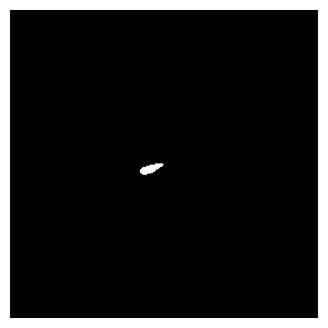

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0097.png


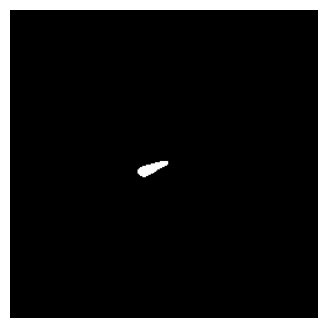

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0098.png


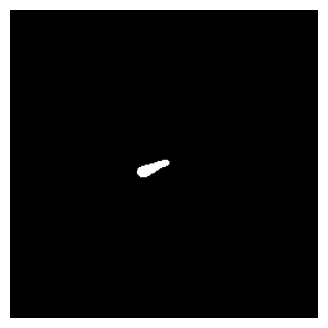

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0099.png


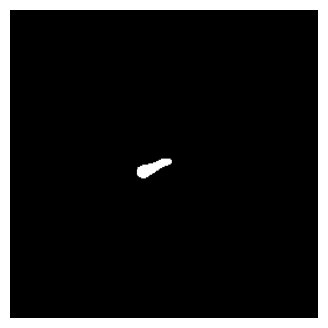

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0100.png


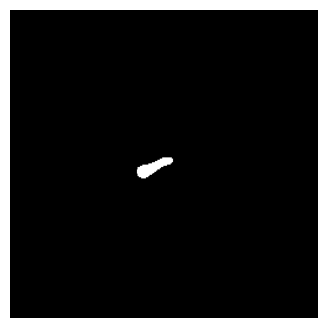

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0101.png


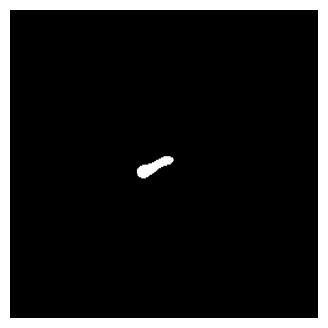

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0102.png


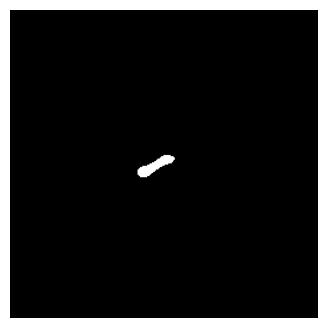

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0103.png


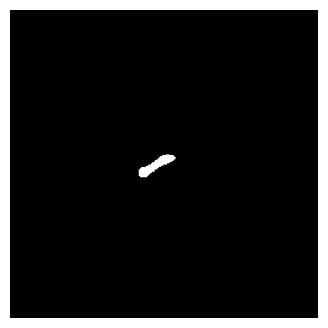

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0104.png


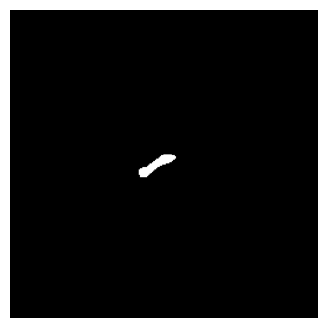

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0105.png


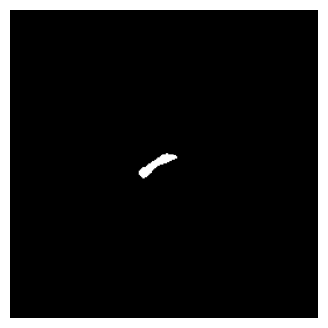

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0106.png


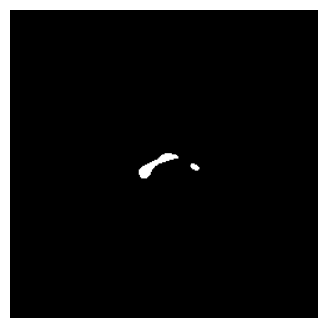

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0107.png


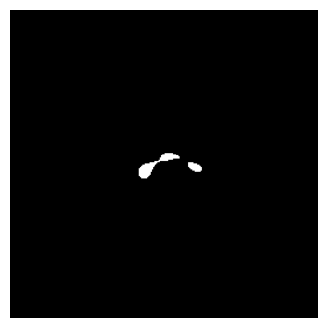

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0108.png


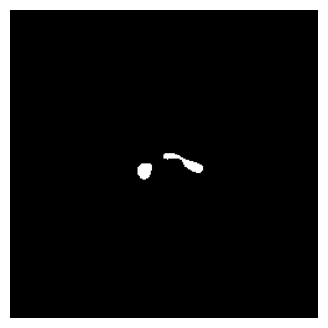

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0109.png


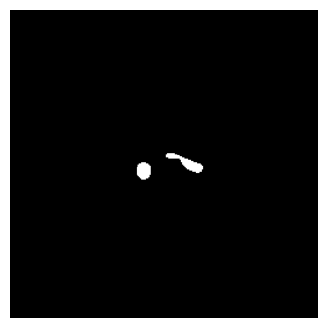

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0110.png


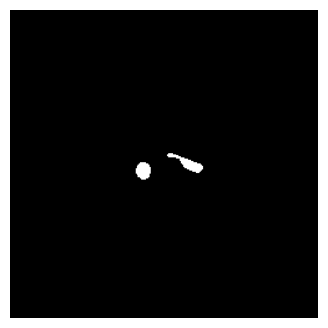

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0111.png


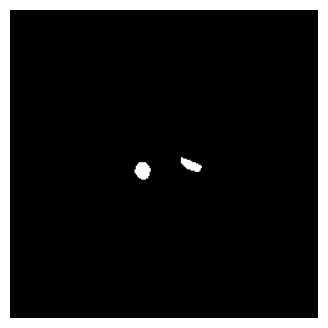

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0112.png


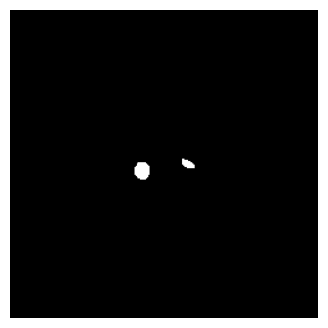

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0113.png


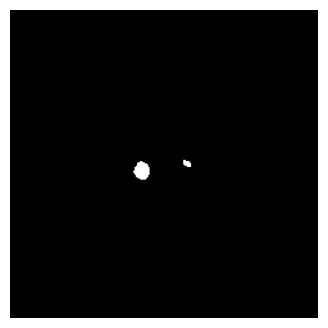

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0114.png


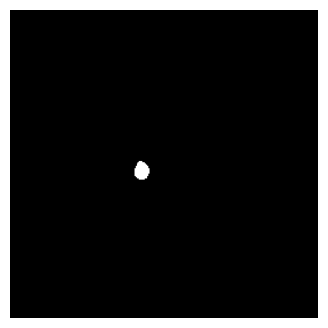

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0115.png


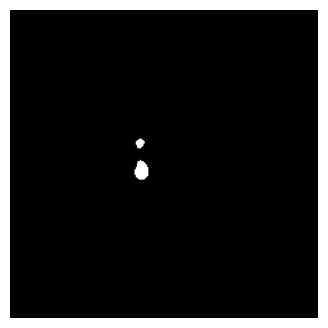

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0116.png


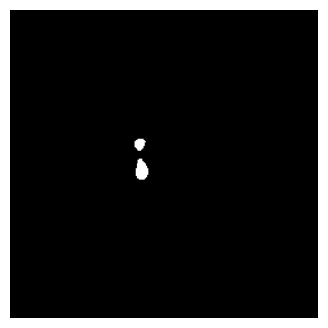

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0117.png


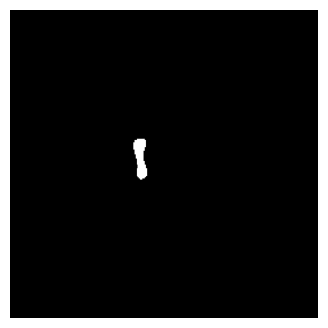

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0118.png


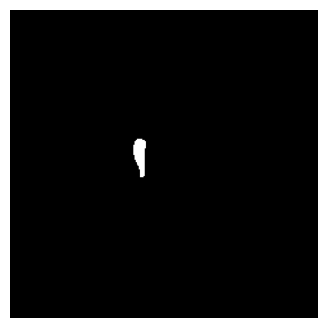

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0119.png


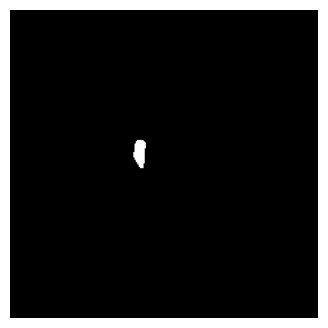

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0120.png


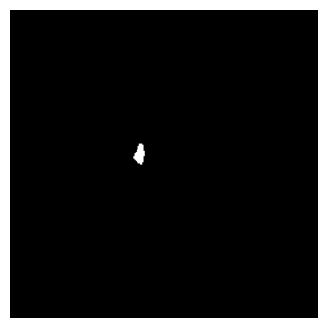

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0121.png


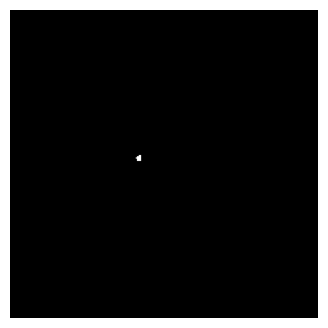

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0122.png


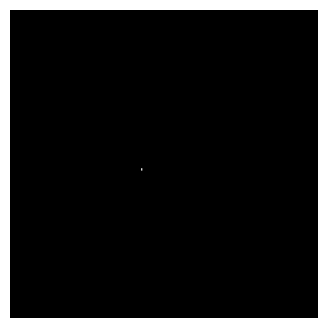

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0124.png


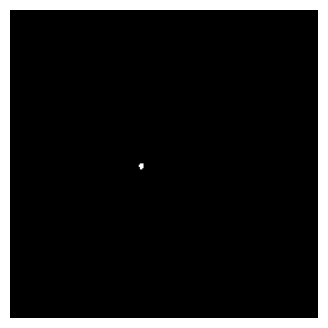

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0125.png


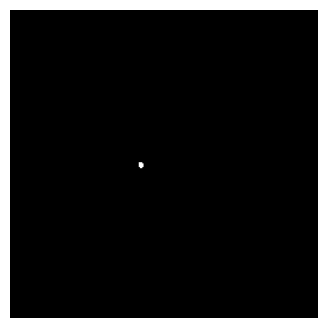

Saving: C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum\5583_seg_0126.png
Total slices processed: 29


In [26]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

# Function to process and save slices from a NIfTI file
def process_nii_to_png(nii_path, output_dir, scale_factor=51):
    # Load the NIfTI image
    nii_img = nib.load(nii_path)
    data = nii_img.get_fdata()
    print(f"Shape of NIfTI data: {data.shape}")

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    images = []
    
    for i in range(data.shape[2]):
        img = data[:, :, i] * scale_factor
        if img.max() > 0:
            img = np.rot90(img)  # Rotate the image
            
            # Display the image
            plt.figure(figsize=(4, 4))
            plt.imshow(img, cmap='gray')  # Using grayscale colormap
            plt.axis('off')
            plt.show()
            
            # Save the image as a PNG file
            newfile = os.path.join(output_dir, f'5583_seg_{str(i).zfill(4)}.png')
            print(f"Saving: {newfile}")
            cv2.imwrite(newfile, img)
            
            images.append(img)
    
    print(f"Total slices processed: {len(images)}")
    return images

# Example usage
nii_path = r"C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/duodenum.nii/duodenum.nii"
output_dir = r"C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png/duodenum"
images = process_nii_to_png(nii_path, output_dir)

In [29]:
import os
import shutil

# Define the base directory
base_dir = r"C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png"
output_dir = r"C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/png_updated"

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to rename and copy images
def rename_and_copy_images(base_dir, output_dir):
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.png'):
                relative_path = os.path.relpath(root, base_dir)
                path_parts = relative_path.split(os.sep)
                
                if len(path_parts) == 1:
                    new_name = f"{path_parts[0]}_{file}"
                elif len(path_parts) == 2:
                    new_name = f"{path_parts[0]}_{path_parts[1]}_{file}"
                elif len(path_parts) == 3:
                    new_name = f"{path_parts[0]}_{path_parts[1]}_{path_parts[2]}_{file}"
                
                source = os.path.join(root, file)
                destination = os.path.join(output_dir, new_name)
                
                shutil.copyfile(source, destination)
                # print(f"Copied {source} to {destination}")

# Run the function
rename_and_copy_images(base_dir, output_dir)


# Combining masks after segmentation

In [4]:
import os
import re
from PIL import Image
import numpy as np

# Function to extract the segmentation number from the filename
def extract_seg_number(filename):
    match = re.search(r'_seg_(\d+)', filename)
    return match.group(1) if match else None

# Function to combine masks with the same segmentation number
def combine_masks(image_directory, output_directory):
    for filename in os.listdir(image_directory):
        if filename.endswith('.png'):
            seg_number = extract_seg_number(filename)
            if seg_number:
                combined_mask = None
                organ_names = set()

                # Iterate through all files in the image directory
                for file in os.listdir(image_directory):
                    if file.endswith('.png') and f'_seg_{seg_number}' in file:
                        organ_name = file.split('_')[0]
                        organ_names.add(organ_name)

                        mask = Image.open(os.path.join(image_directory, file)).convert('L')
                        mask_array = np.array(mask)

                        if combined_mask is None:
                            combined_mask = mask_array
                        else:
                            combined_mask = np.maximum(combined_mask, mask_array)

                # Combine organ names to create the new filename
                new_filename = '_'.join(sorted(organ_names)) + f'_seg_{seg_number}.png'
                output_path = os.path.join(output_directory, new_filename)

                # Save the combined mask as a new image
                combined_image = Image.fromarray(combined_mask)
                combined_image.save(output_path)

                print(f'Combined mask saved as {output_path}')

# Example usage
image_path = 'C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/seg_masks_color/'
output_directory = 'C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/'

# Combine masks for all segmentation numbers present in the image directory
combine_masks(image_path, output_directory)


Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0024.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0025.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0026.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0027.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0028.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0029.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0030.png
Combined mask saved as C:/Users/Dipanshu/Downloa

In [10]:
import os
import re
from PIL import Image
import numpy as np

# Organ color mapping
organ_color_map = {
    'bowel': (255, 0, 255),        # Magenta for bowel
    'liver': (255, 0, 0),          # Red for liver
    'spleen': (0, 255, 0),         # Green for spleen
    'kidney_right': (0, 255, 255), # Cyan for right kidney
    'kidney_left': (0, 0, 255)     # Blue for left kidney
}

# Function to extract the segmentation number from the filename
def extract_seg_number(filename):
    match = re.search(r'_seg_(\d+)', filename)
    return match.group(1) if match else None

# Function to combine masks with the same segmentation number
def combine_masks(image_directory, output_directory):
    for filename in os.listdir(image_directory):
        if filename.endswith('.png'):
            seg_number = extract_seg_number(filename)
            if seg_number:
                combined_image = None
                organ_names = set()

                # Iterate through all files in the image directory
                for file in os.listdir(image_directory):
                    if file.endswith('.png') and f'_seg_{seg_number}' in file:
                        organ_name = file.split('_')[0]
                        organ_names.add(organ_name)

                        mask_path = os.path.join(image_directory, file)
                        
                        # Open mask and convert to RGBA mode
                        mask = Image.open(mask_path).convert('RGBA')
                        
                        # Apply color from organ_color_map
                        color = organ_color_map.get(organ_name, (0, 0, 0))
                        colored_mask = Image.new('RGBA', mask.size, color)
                        blended_mask = Image.blend(mask, colored_mask, alpha=0.5)

                        if combined_image is None:
                            combined_image = blended_mask
                        else:
                            combined_image = Image.alpha_composite(combined_image, blended_mask)

                # Create the combined mask image with RGBA mode
                combined_mask = Image.new('RGBA', combined_image.size)
                combined_mask.paste(combined_image, (0, 0), combined_image)

                # Combine organ names to create the new filename
                new_filename = '_'.join(sorted(organ_names)) + f'_seg_{seg_number}.png'
                output_path = os.path.join(output_directory, new_filename)

                # Save the combined mask as a new image
                combined_mask.save(output_path)

                print(f'Combined mask saved as {output_path}')

# Example usage
image_path = 'C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/seg_masks_color/'
output_directory = 'C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/'

# Combine masks for all segmentation numbers present in the image directory
combine_masks(image_path, output_directory)


Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0024.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0025.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0026.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0027.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0028.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0029.png
Combined mask saved as C:/Users/Dipanshu/Downloads/seg_mask_10104_27573/kaggle/temp/masks_10104_27573/Combined_masks/bowel_seg_0030.png
Combined mask saved as C:/Users/Dipanshu/Downloa

# dcm and mask mapping 

In [ ]:
import pandas as pd

# Load series metadata from CSV (example structure)
series_metadata = pd.read_csv('series_metadata.csv')

# Function to get total slices for a DICOM series ID
def get_total_slices_for_series(series_id):
    try:
        return int(series_metadata.loc[series_metadata['SeriesID'] == series_id, 'TotalSlices'].values[0])
    except IndexError:
        return None  # Series ID not found in metadata

# Example usage
series_id = '51033'
total_slices = get_total_slices_for_series(series_id)
print(f"Total slices for series ID {series_id}: {total_slices}")


In [ ]:
import os
import pandas as pd

# Example DICOM instance numbers with corresponding series IDs
dicom_instance_series_mapping = {
    1044: '51033',
    974: '51033',
    1022: '21057',
    957: '21057',
    64: '397',
    64: '397',
    245: '10494',
    214: '10494',
}

# Directory containing segmentation masks
segmentation_masks_dir = '../Data/segmentation_masks/'

# List to store tuples of (DICOM instance number, series ID, slice number) where mask exists
corresponding_images_masks = []

# Iterate through each DICOM instance number and series ID pair
for instance_number, series_id in dicom_instance_series_mapping.items():
    # Determine the total slices for the current DICOM series ID (assuming it's known)
    total_slices = get_total_slices_for_series(series_id)  # Function to retrieve total slices
    
    # Iterate through each slice number for the current series ID
    for slice_number in range(total_slices):
        # Construct the path to the segmentation mask file
        mask_filename = f"{series_id}_{slice_number:04d}.nii"
        mask_filepath = os.path.join(segmentation_masks_dir, mask_filename)
        
        # Check if the segmentation mask file exists
        if os.path.exists(mask_filepath):
            corresponding_images_masks.append((instance_number, series_id, slice_number))

# Convert the list of tuples to a DataFrame for clarity
corresponding_images_masks_df = pd.DataFrame(corresponding_images_masks, columns=['DICOM_InstanceNumber', 'DICOM_SeriesID', 'SliceNumber'])

# Save the DataFrame to CSV
corresponding_images_masks_df.to_csv('../Data/corresponding_images_masks_by_instance.csv', index=False)

print("Corresponding DICOM images and segmentation masks by instance number saved to corresponding_images_masks_by_instance.csv")



In [4]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('../Outputs/Preprocessing/Results/run/detect/train/weights/best.pt')

# Path to the test images
test_image_path = '../Outputs/Preprocessing/test_images_png'

# Perform inference
results = model.predict(source=test_image_path, conf=0.4, iou=0.5)

# Check predictions
for result in results:
    predictions = result.pandas().xyxy[0]  # Get predictions in pandas DataFrame format
    print(predictions[['name', 'confidence']])  # Print labels and confidence scores



image 1/3 e:\MS_AI_ML\Dissertation\Abdominal\Notebooks\..\Outputs\Preprocessing\test_images_png\48843_62825_0030.png: 512x512 (no detections), 11.1ms
image 2/3 e:\MS_AI_ML\Dissertation\Abdominal\Notebooks\..\Outputs\Preprocessing\test_images_png\50046_24574_0030.png: 512x512 (no detections), 8.5ms
image 3/3 e:\MS_AI_ML\Dissertation\Abdominal\Notebooks\..\Outputs\Preprocessing\test_images_png\63706_39279_0030.png: 512x512 1 liver_healthy, 16.9ms
Speed: 0.8ms preprocess, 12.1ms inference, 74.6ms postprocess per image at shape (1, 3, 512, 512)


AttributeError: 'Results' object has no attribute 'pandas'. See valid attributes below.

    A class for storing and manipulating inference results.

    Attributes:
        orig_img (numpy.ndarray): Original image as a numpy array.
        orig_shape (tuple): Original image shape in (height, width) format.
        boxes (Boxes, optional): Object containing detection bounding boxes.
        masks (Masks, optional): Object containing detection masks.
        probs (Probs, optional): Object containing class probabilities for classification tasks.
        keypoints (Keypoints, optional): Object containing detected keypoints for each object.
        speed (dict): Dictionary of preprocess, inference, and postprocess speeds (ms/image).
        names (dict): Dictionary of class names.
        path (str): Path to the image file.

    Methods:
        update(boxes=None, masks=None, probs=None, obb=None): Updates object attributes with new detection results.
        cpu(): Returns a copy of the Results object with all tensors on CPU memory.
        numpy(): Returns a copy of the Results object with all tensors as numpy arrays.
        cuda(): Returns a copy of the Results object with all tensors on GPU memory.
        to(*args, **kwargs): Returns a copy of the Results object with tensors on a specified device and dtype.
        new(): Returns a new Results object with the same image, path, and names.
        plot(...): Plots detection results on an input image, returning an annotated image.
        show(): Show annotated results to screen.
        save(filename): Save annotated results to file.
        verbose(): Returns a log string for each task, detailing detections and classifications.
        save_txt(txt_file, save_conf=False): Saves detection results to a text file.
        save_crop(save_dir, file_name=Path("im.jpg")): Saves cropped detection images.
        tojson(normalize=False): Converts detection results to JSON format.
    

In [6]:
results = model.predict(source=test_image_path, conf=0.4, iou=0.5)
import os
# Iterate over the results and corresponding original image paths
for result in results:
    # Get the original image path
    original_image_path = result.orig_img
    filename = os.path.basename(original_image_path)
    
    # Get the image with predictions
    img_with_predictions = result.plot()  # This returns the image with predictions
    
    # Save the image with predictions
    output_file_path = os.path.join(output_directory, filename)
    cv2.imwrite(output_file_path, img_with_predictions)

    # Print detection results
    boxes = result.boxes  # Access detection bounding boxes
    for box in boxes:
        print(f"Class: {box.cls}, Confidence: {box.conf}, Coordinates: {box.xyxy}")


image 1/3 e:\MS_AI_ML\Dissertation\Abdominal\Notebooks\..\Outputs\Preprocessing\test_images_png\48843_62825_0030.png: 512x512 (no detections), 0.0ms
image 2/3 e:\MS_AI_ML\Dissertation\Abdominal\Notebooks\..\Outputs\Preprocessing\test_images_png\50046_24574_0030.png: 512x512 (no detections), 15.6ms
image 3/3 e:\MS_AI_ML\Dissertation\Abdominal\Notebooks\..\Outputs\Preprocessing\test_images_png\63706_39279_0030.png: 512x512 1 liver_healthy, 10.2ms
Speed: 201.6ms preprocess, 8.6ms inference, 5.3ms postprocess per image at shape (1, 3, 512, 512)


TypeError: expected str, bytes or os.PathLike object, not ndarray

In [ ]:
E:\MS_AI_ML\Dissertation\Abdominal\Inputs\segmentations




In [3]:
import os

# Define the paths
segmentations_dir = "../Inputs/segmentations"
train_images_dir = "../Inputs/train_images"

# Step 1: List all .nii files in the segmentations directory and extract their series IDs
segmentation_files = [f for f in os.listdir(segmentations_dir) if f.endswith('.nii')]
segmentation_series_ids = [os.path.splitext(f)[0] for f in segmentation_files]

# Step 2: List all series ID folders in the train_images directory
train_images_series_ids = []
for patient_id in os.listdir(train_images_dir):
    patient_path = os.path.join(train_images_dir, patient_id)
    if os.path.isdir(patient_path):
        for series_id in os.listdir(patient_path):
            series_path = os.path.join(patient_path, series_id)
            if os.path.isdir(series_path):
                train_images_series_ids.append(series_id)

# Step 3: Match and count the series IDs
matched_series_ids = set(segmentation_series_ids).intersection(set(train_images_series_ids))
matched_count = len(matched_series_ids)

# Output the results
print(f"Total series IDs in segmentations: {len(segmentation_series_ids)}")
print(f"Total series IDs in train_images: {len(train_images_series_ids)}")
print(f"Matched series IDs: {matched_count}")

# Optional: Output the matched series IDs
print(f"Matched series IDs: {matched_series_ids}")


Total series IDs in segmentations: 206
Total series IDs in train_images: 136
Matched series IDs: 136
Matched series IDs: {'11748', '10385', '12674', '8413', '40471', '64520', '32243', '34774', '41288', '61747', '45406', '13774', '10000', '31085', '4929', '53000', '6575', '24134', '13925', '19657', '58697', '28122', '778', '39864', '51141', '12114', '8236', '13307', '52279', '52961', '64117', '26942', '22232', '42173', '5118', '63205', '5218', '39222', '62307', '527', '22479', '7397', '16503', '20664', '48324', '55928', '16097', '12402', '16066', '62680', '59325', '1201', '58548', '47438', '22397', '525', '15415', '26980', '15539', '40186', '4759', '61569', '137', '44758', '6172', '24373', '34232', '4890', '33355', '43233', '24774', '15271', '60755', '36753', '24442', '5260', '12102', '62556', '4622', '25349', '18624', '17577', '7334', '18207', '6631', '51136', '50875', '37032', '30902', '40781', '5104', '24645', '13041', '31146', '50212', '55965', '54917', '397', '47856', '47775', '429